In [1]:
from cideMOD import (
    CellParser,
    ErrorCheck,
    NDProblem,
    Problem,
    SolverCrashed,
    Trigger,
    init_results_folder,
    ModelOptions,
)

import os
import numpy as np
import matplotlib.pyplot as plt
import time as tm

Data + Define model options

In [2]:
#Define Chen path
overwrite = True
case = "Chen_2020"
data_path = "Data/data_{}".format(case)
params = "params_tuned.json"

C_rate = -1
I_app = -1 #C_rate * problem.Q
t_f = 3600 /abs(C_rate)*1.25
v_min = Trigger(2.5, "v")
#P4D modell
#Vi setter i=5 for å se om vi får noe nyttig
i=6
model_options = ModelOptions(mode='P4D', clean_on_exit=False,N_x=i,N_y=i,N_z=i)
cell = CellParser(params, data_path=data_path)

Capacidad Anodo: 5.090421993425188
Capacidad Catodo: 5.574712396434605
Capacidad Celda: 5.090421993425188


Standard problem using the Gmsh mesher

In [ ]:
problem1= Problem(cell, model_options)
problem1.set_cell_state(1, 273 + 25, 273 + 25)
problem1.setup(mesh_engine='GmshMesher')

Standard problem

In [5]:
problem2= Problem(cell, model_options)
problem2.set_cell_state(1, 273 + 25, 273 + 25)
problem2.setup()

Building mesh for P4D problem with 3 components and 648 nodes.
Finished building mesh
Building problem setup
 - Build cell parameters - Done 
 - Initializing state - Done 
 - Build variational formulation - Done 
Problem Setup finished.
Problem has 4656.0 dofs.



Non dimensional problem

In [ ]:
problem3=NDProblem(cell,model_options)
problem3.set_cell_state(1, 273 + 25, 273 + 25)
problem3.setup()

Cylindrical mesh 

In [3]:
#Using the cylinder option
problem4= Problem(cell, model_options)
problem4.set_cell_state(1, 273 + 25, 273 + 25)
problem4.setup(mesh_engine="Cylinder")

Building mesh for P4D problem with 3 components and 648 nodes.


/home/andreas/.local/lib/python3.10/site-packages/cideMOD/mesh/base_mesher.py:386: SyntaxWarning: "is" with a literal. Did you mean "=="?
  a_s_c_order = all([self.structure[i+1]=='s' for i, el in enumerate(self.structure) if el is 'a'])
/home/andreas/.local/lib/python3.10/site-packages/cideMOD/mesh/base_mesher.py:546: SyntaxWarning: "is" with a literal. Did you mean "=="?
  a_s_c_order = all([self.structure[i+1]=='s' for i, el in enumerate(self.structure) if el is 'a'])
/home/andreas/.local/lib/python3.10/site-packages/cideMOD/mesh/base_mesher.py:386: SyntaxWarning: "is" with a literal. Did you mean "=="?
  a_s_c_order = all([self.structure[i+1]=='s' for i, el in enumerate(self.structure) if el is 'a'])
/home/andreas/.local/lib/python3.10/site-packages/cideMOD/mesh/base_mesher.py:546: SyntaxWarning: "is" with a literal. Did you mean "=="?
  a_s_c_order = all([self.structure[i+1]=='s' for i, el in enumerate(self.structure) if el is 'a'])


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to read data from XML file.
*** Reason:  Unable to open file "cylinder2.xml".
*** Where:   This error was encountered inside XMLFile.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.2.0.dev0
*** Git changeset:  unknown
*** -------------------------------------------------------------------------


We run the solver for our Gmsh mesh

In [3]:
#min_step=36 implies 100 steps pr  simulation (1 hour)
status = problem1.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

Solving ...
initializing solution
Voltage: 0.4294	Current: 0.00e+00	Time: *** Warning: PETSc SNES solver diverged in 4 iterations with divergence reason DIVERGED_LINE_SEARCH.


Solving the problem with the DolfinMesh

In [15]:
#min_step=36 implies 100 steps pr  simulation (1 hour)
status = problem2.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

Solving ...
initializing solution
Voltage is 2.5 V at 3555.79 s 



In [4]:
#min_step=36 implies 100 steps pr  simulation (1 hour)
#SLOW!
status = problem3.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

Solving ...
initializing solution
Reached max time 4500.00 00e+00	Time: 1h 11min 26s



What do we get?

In [13]:
print(problem1.WH.global_vars.keys())
print(problem2.WH.global_vars.keys())

dict_keys(['voltage', 'current', 'capacity'])
dict_keys(['voltage', 'current', 'capacity'])


But what do these keys contain?

In [14]:
print(problem1.WH.global_var_arrays)
print(problem2.WH.global_var_arrays)

[[0.0], [0.4293755769407422], [0.0], [0.0]]
[[0.0, 36.0, 72.0, 108.0, 144.0, 180.0, 216.0, 252.0, 288.0, 324.0, 360.0, 396.0, 432.0, 468.0, 504.0, 540.0, 576.0, 612.0, 648.0, 684.0, 720.0, 756.0, 792.0, 828.0, 864.0, 900.0, 936.0, 972.0, 1008.0, 1044.0, 1080.0, 1116.0, 1152.0, 1188.0, 1224.0, 1260.0, 1296.0, 1332.0, 1368.0, 1404.0, 1440.0, 1476.0, 1512.0, 1548.0, 1584.0, 1620.0, 1656.0, 1692.0, 1728.0, 1764.0, 1800.0, 1836.0, 1872.0, 1908.0, 1944.0, 1980.0, 2016.0, 2052.0, 2088.0, 2124.0, 2160.0, 2196.0, 2232.0, 2268.0, 2304.0, 2340.0, 2376.0, 2412.0, 2448.0, 2484.0, 2520.0, 2556.0, 2592.0, 2628.0, 2664.0, 2700.0, 2736.0, 2772.0, 2808.0, 2844.0, 2880.0, 2916.0, 2952.0, 2988.0, 3024.0, 3060.0, 3096.0, 3132.0, 3168.0, 3204.0, 3240.0, 3276.0, 3312.0, 3348.0, 3384.0, 3420.0, 3456.0, 3492.0, 3528.0, 3554.1869281026948, 3555.108110286779, 3555.108110286779, 3555.642203346667, 3555.642203346667, 3555.7936348142407], [4.180872219481423, 3.983739461674425, 3.9544872940915012, 3.942410546859624,

Gmsh mesh does not seem to be working
We plot the results from problem 2

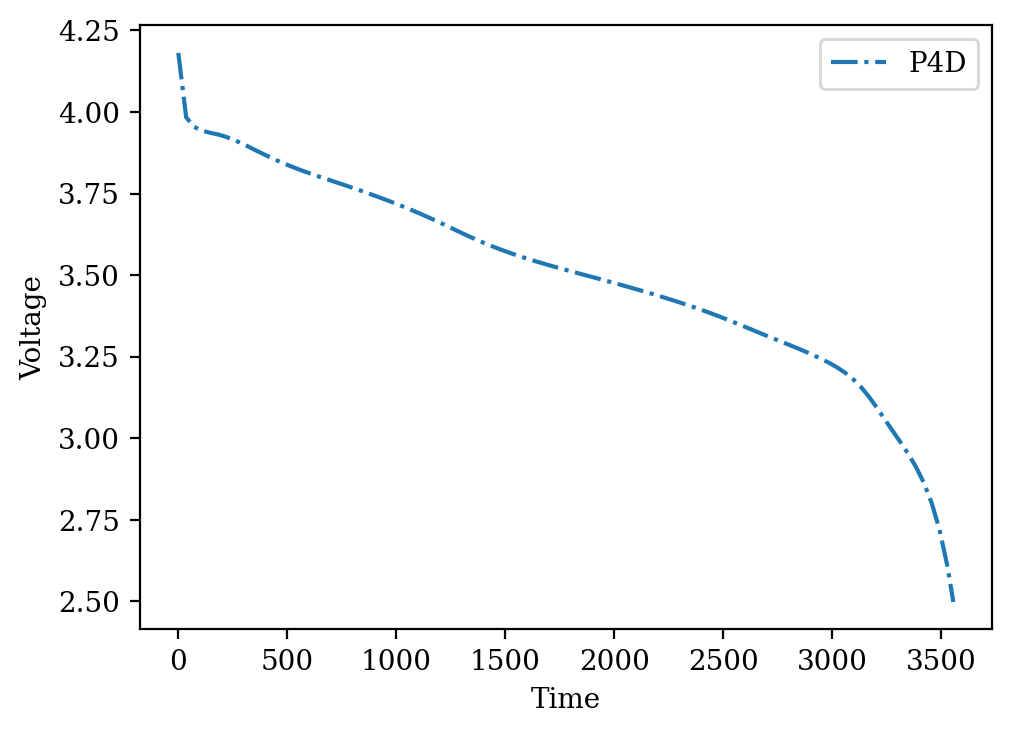

In [7]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax1.plot(problem2.WH.global_var_arrays[0], problem2.WH.global_var_arrays[1], "-.")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage")
ax1.legend(["P4D"], loc="best")

Plot current vs tid

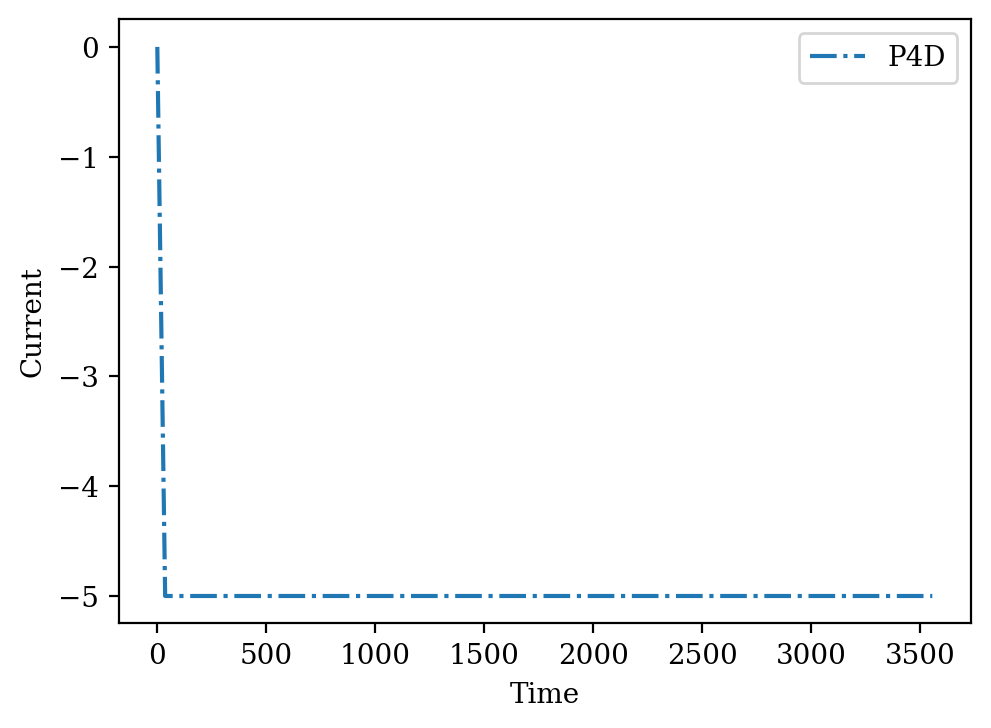

In [8]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax2 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax2.plot(problem2.WH.global_var_arrays[0], problem2.WH.global_var_arrays[2], "-.")
ax2.set_xlabel("Time")
ax2.set_ylabel("Current")
ax2.legend(["P4D"], loc="best")

Time vs capacity

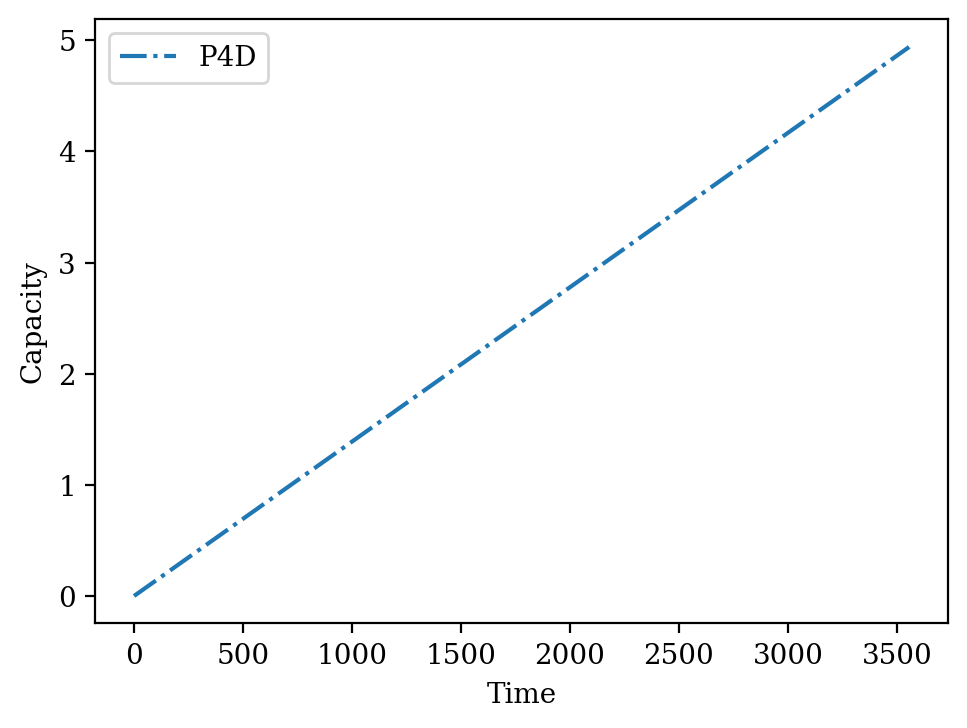

In [9]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax2 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax2.plot(problem2.WH.global_var_arrays[0], problem2.WH.global_var_arrays[3], "-.")
ax2.set_xlabel("Time")
ax2.set_ylabel("Capacity")
ax2.legend(["P4D"], loc="best")